In [1]:
# Data Cleanning

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading data
data_raw = pd.read_csv("48_Industry_Portfolios.csv", skiprows=11, header=0)

# Verify the loaded data
#print(data_raw.head())

# Retrieve weighted monthly returns for the 48 industries
data_full = data_raw.iloc[0:1181]
data_full = data_full.iloc[:, 1:].apply(pd.to_numeric, errors="coerce") #convert datatypes to numeric

# Extract last 5 years data
returns_48 = data_full.tail(60)

print(returns_48)

      Agric  Food   Soda   Beer   Smoke  Toys   Fun    Books  Hshld  Clths  \
1121  11.14   3.06   3.97   1.39   3.22  -1.02   4.91   3.26   2.59   7.58   
1122  -3.31  -1.38   5.21   2.70  -3.66  -3.37   1.01  -4.34   0.39  -5.41   
1123  -6.11  -9.30  -8.19  -7.47  -6.71 -17.11  -3.68  -6.65  -8.46  -9.54   
1124 -11.12  -4.24 -15.44  -9.92  -6.76 -18.85 -16.29 -22.65  -6.75 -19.46   
1125   9.59   8.60   4.76  10.94   1.98  18.03  14.67   8.39  10.26  11.13   
1126   5.10   3.67   4.06   0.92  -1.21   1.58   3.36  11.78   2.12  11.49   
1127  -2.56  -0.29  -3.26   0.35  -0.72   9.14   2.55   1.31   1.97   2.99   
1128   5.69   5.98   6.97   5.43   7.78  15.05   4.39   5.01   7.76   0.66   
1129  -0.37   3.45   5.61   2.61   4.77   7.51  12.49   3.64   4.83  12.21   
1130   0.25  -3.97  -0.58   0.25  -6.55  10.98  -4.64  -4.59  -0.65   5.84   
1131  12.55  -3.15  -2.78  -4.60  -5.69   6.66  -4.42  -6.10  -0.53  -1.76   
1132  15.18   7.25   9.21  11.09   8.05  21.06  11.49  23.80   5

In [3]:
# Calculate the industries return and standard deviation
industry_returns = data_full.mean()
industry_std = data_full.std()

# Calculate the Sharpe Ratio with rf=0
sharpe_ratios = industry_returns / industry_std

# Find the top 5 industries
top_industries = sharpe_ratios.sort_values(ascending=False).head(5)
print(top_industries)

Food     0.199862
Smoke    0.197648
Drugs    0.193820
MedEq    0.182093
Telcm    0.179515
dtype: float64


In [5]:
# Extract the data of the selected 5 industries
returns = returns_48[top_industries.index]
print(returns)

      Food   Smoke  Drugs  MedEq  Telcm
1121   3.06   3.22   4.08   1.24   1.04
1122  -1.38  -3.66  -2.46  -0.96  -2.11
1123  -9.30  -6.71  -4.77  -7.65  -6.21
1124  -4.24  -6.76  -2.39 -11.44 -13.30
1125   8.60   1.98  13.24  13.86   9.51
1126   3.67  -1.21   3.87   5.24   4.81
1127  -0.29  -0.72  -1.32  -1.58  -2.62
1128   5.98   7.78   1.40  11.01   5.05
1129   3.45   4.77   2.05   3.49   5.60
1130  -3.97  -6.55  -1.53  -1.43  -1.97
1131  -3.15  -5.69  -5.30  -2.91  -3.87
1132   7.25   8.05  10.37   7.59  14.48
1133   1.94   8.67   3.86   6.33   5.15
1134  -1.32  -2.28   3.96   1.45  -3.53
1135  -0.05   5.73  -2.09   1.15   4.26
1136   8.01  11.71  -0.15  -0.56   1.64
1137   2.70   1.43   1.64   6.09   3.06
1138   3.90   2.04   0.89  -3.12  -0.52
1139  -3.10   2.00   4.95   3.84  -0.01
1140  -2.43   0.96   2.14   5.02   0.35
1141  -0.56   3.47   3.66   2.46   1.36
1142  -2.20  -7.05  -6.39  -4.44  -5.59
1143   2.28  -1.37   1.86   3.64  -4.23
1144  -3.44  -7.02  -2.11  -7.64  -7.18


In [7]:
# A1

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# expected return and standard deviation
mean_returns = returns.mean()
sd_returns = returns.std()

# covariance matrix
cov_matrix = returns.cov()

# A, B, C, Delta
A = np.dot(np.ones(len(mean_returns)), np.dot(np.linalg.inv(cov_matrix), np.ones(len(mean_returns))))  # 1'Σ^-1 1
B = np.dot(np.ones(len(mean_returns)), np.dot(np.linalg.inv(cov_matrix), mean_returns))  # 1'Σ^-1 z
C = np.dot(mean_returns, np.dot(np.linalg.inv(cov_matrix), mean_returns))  # z'Σ^-1 z
Delta = A * C - B**2  # Δ = AC - B^2

# verify for A > 0, C > 0 and delta > 0
def verify_conditions(A, C, Delta):
    if A > 0 and C > 0 and Delta > 0:
        return True
    else:
        return False

if verify_conditions(A, C, Delta):
    print("Conditions are satisfied：A > 0, C > 0 and delta > 0")
else:
    print("Conditions are not satisfied")

Conditions are satisfied：A > 0, C > 0 and delta > 0


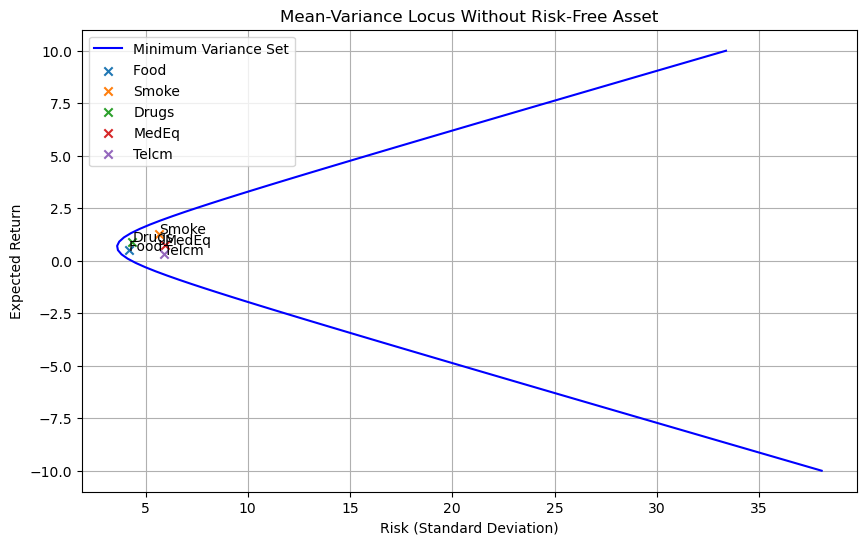

In [9]:
# λ and γ
mu_values = np.linspace(-10, 10, 100) # μ 
lambda_values = (C - mu_values * B) / Delta  # λ = (C - μB) / Δ
gamma_values = (mu_values * A - B) / Delta  # γ = (μA - B) / Δ

# minimum variance set
variance_values = (A * mu_values**2 - 2 * B * mu_values + C) / Delta  

# Specify each industry portfolio in the chart
industry_returns = mean_returns
industry_risks = sd_returns

# Draw the minimum variance set
plt.figure(figsize=(10, 6))
plt.plot(np.sqrt(variance_values), mu_values, label="Minimum Variance Set", color='blue')

# Plot each industry points
for i, industry in enumerate(returns.columns):
    plt.scatter(industry_risks.iloc[i], industry_returns.iloc[i], label=industry, marker='x')

# Add label
for i, industry in enumerate(returns.columns):
    plt.text(industry_risks.iloc[i], industry_returns.iloc[i], f'{industry}', fontsize=10)

# Add title and label
plt.title('Mean-Variance Locus Without Risk-Free Asset')
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Expected Return')
plt.grid(True)
plt.legend()
plt.show()

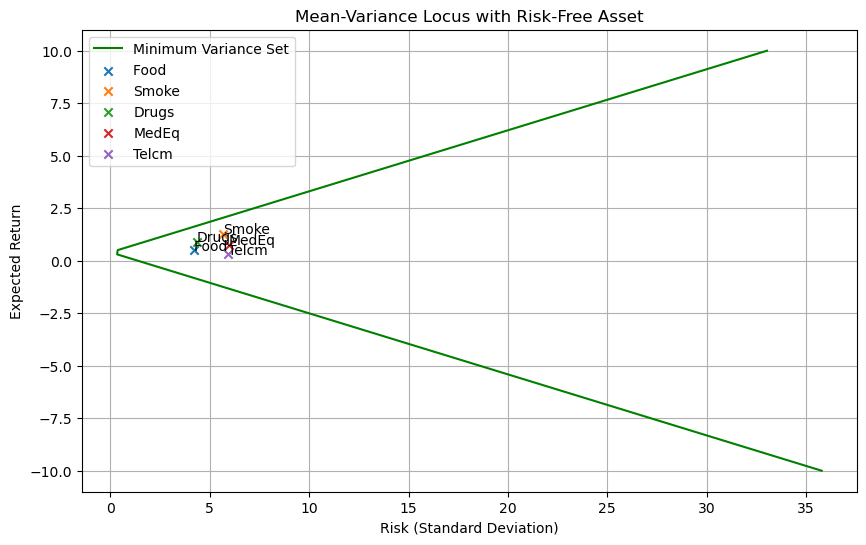

In [11]:
# A2

# Set risk free rate
risk_free_rate = 0.4

# minimum variance set
variance_values_rf = ((mu_values - risk_free_rate)**2) / (C - 2 * risk_free_rate * B + A * risk_free_rate**2)

# draw the minimum variance set
plt.figure(figsize=(10, 6))
plt.plot(np.sqrt(variance_values_rf), mu_values, label="Minimum Variance Set", color="green")

# plot each industry points
for i, industry in enumerate(returns.columns):
    plt.scatter(industry_risks.iloc[i], industry_returns.iloc[i], label=industry, marker='x')

# add label
for i, industry in enumerate(returns.columns):
    plt.text(industry_risks.iloc[i], industry_returns.iloc[i], f'{industry}', fontsize=10)

# title and label
plt.title('Mean-Variance Locus with Risk-Free Asset')
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Expected Return')
plt.grid(True)
plt.legend()
plt.show()

In [13]:
# A3

# Calculate the inverse of the covariance matrix
inv_cov_matrix = np.linalg.inv(cov_matrix)

# Vector of ones
ones = np.ones(len(mean_returns))

# GMVP weights (using the formula for global minimum variance portfolio)
weights = inv_cov_matrix.dot(ones) / ones.T.dot(inv_cov_matrix).dot(ones)

# GMVP expected return
gmvp_expected_return = np.dot(weights, mean_returns)

print("GMVP Weights:", weights)
print("GMVP Expected Return:", gmvp_expected_return)

# Compare GMVP expected return with risk-free rate
if gmvp_expected_return > risk_free_rate:
    print(f"GMVP Expected Return ({gmvp_expected_return}) is greater than the Risk-Free Rate ({risk_free_rate})")
elif gmvp_expected_return < risk_free_rate:
    print(f"GMVP Expected Return ({gmvp_expected_return}) is less than the Risk-Free Rate ({risk_free_rate})")
else:
    print(f"GMVP Expected Return ({gmvp_expected_return}) is equal to the Risk-Free Rate ({risk_free_rate})")

GMVP Weights: [ 0.54853412  0.02917948  0.57994104 -0.28752291  0.12986827]
GMVP Expected Return: 0.6615921753251051
GMVP Expected Return (0.6615921753251051) is greater than the Risk-Free Rate (0.4)


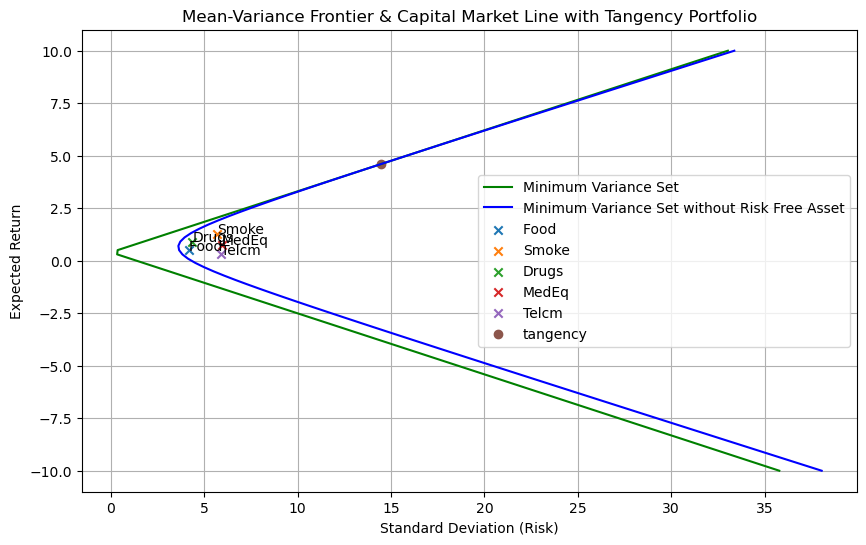

In [15]:
# Tangency portfolio
z_t = (C - B * risk_free_rate)/(B - A * risk_free_rate)
sigma_t = (C - 2 * risk_free_rate * B + A * risk_free_rate**2)/((B - A * risk_free_rate)**2)

# plot
plt.figure(figsize=(10, 6))
plt.plot(np.sqrt(variance_values_rf), mu_values, label="Minimum Variance Set", color="green")
plt.plot(np.sqrt(variance_values), mu_values, label="Minimum Variance Set without Risk Free Asset", color='blue')

# plot each industry points
for i, industry in enumerate(returns.columns):
    plt.scatter(industry_risks.iloc[i], industry_returns.iloc[i], label=industry, marker='x')

# add label
for i, industry in enumerate(returns.columns):
    plt.text(industry_risks.iloc[i], industry_returns.iloc[i], f'{industry}', fontsize=10)

# plot tengency portfolio
plt.scatter(np.sqrt(sigma_t), z_t,label='tangency', marker='o')

plt.title("Mean-Variance Frontier & Capital Market Line with Tangency Portfolio")
plt.xlabel("Standard Deviation (Risk)")
plt.ylabel("Expected Return")
plt.legend()
plt.grid(True)
plt.show()

In [17]:
ones = np.ones(len(mean_returns))
z_minus_R = mean_returns - risk_free_rate * ones  # z - R1

# Σ^-1 * (z - R1)
numerator = inv_cov_matrix.dot(z_minus_R)
# B - AR
denominator = B - A * risk_free_rate

# Calculate the tangency portfolio weights
weights_tangency = numerator / denominator

industries = ['Food', 'Smoke', 'Drugs', 'MedEq', 'Telcm']

for industry, weight in zip(industries, weights_tangency):
    print(f"{industry}: {weight:.4f}")

print('Return: ', z_t)
print('Volatility: ', np.sqrt(sigma_t))

Food: -3.0017
Smoke: 3.3682
Drugs: 2.2649
MedEq: 0.5538
Telcm: -2.1853
Return:  4.604487964093256
Volatility:  14.467667866238353


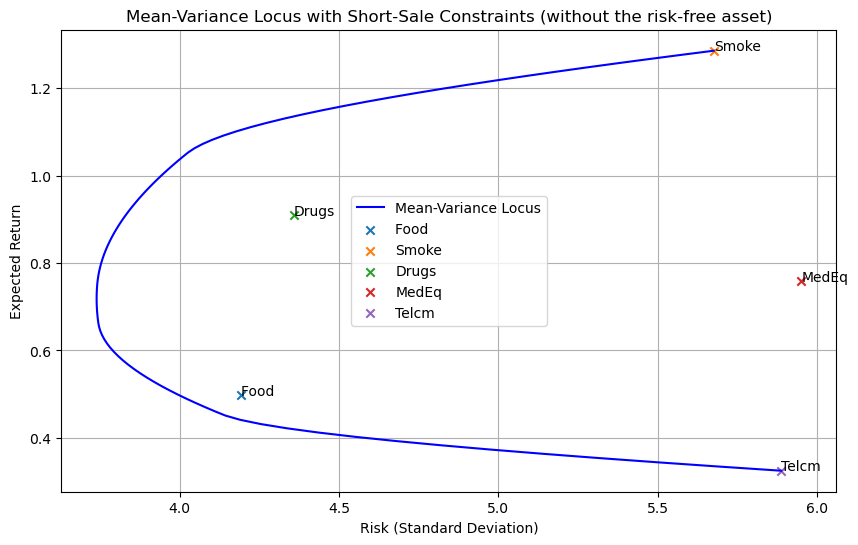

In [19]:
# A4
from scipy.optimize import minimize

# Objective function: minimize the portfolio risk
def objective(w):
    return w.T.dot(cov_matrix).dot(w)

# Constraint: the sum of weights should equal 1
def constraint(w):
    return np.sum(w) - 1

# Short-sale constraint: weights should be greater than or equal to 0
def short_sale_constraint(w):
    return w  # All weights should be >= 0

# Initial guess: equally distribute the weights
initial_guess = np.ones(len(mean_returns)) / len(mean_returns)

# Boundary conditions: all weights should be between 0 and 1
bounds = [(0, 1) for _ in range(len(mean_returns))]

# Minimize the objective function while satisfying the constraints
constraints = ({'type': 'eq', 'fun': constraint},
               {'type': 'ineq', 'fun': short_sale_constraint})

result = minimize(objective, initial_guess, bounds=bounds, constraints=constraints)

# Obtain the optimal portfolio weights
optimal_weights = result.x

# Plot the mean-variance locus
mu_values = np.linspace(min(mean_returns), max(mean_returns), 100)
variance_values = np.zeros_like(mu_values)

for i, mu in enumerate(mu_values):
    # Calculate the optimal portfolio variance for each target return
    def objective_for_mu(w):
        return w.T.dot(cov_matrix).dot(w)

    # Update constraint: target return should equal mu
    def constraint_for_mu(w):
        return np.dot(mean_returns, w) - mu

    constraints = ({'type': 'eq', 'fun': constraint_for_mu},
                   {'type': 'eq', 'fun': constraint})

    # Minimize the objective function and calculate the corresponding optimal portfolio variance
    result_for_mu = minimize(objective_for_mu, initial_guess, bounds=bounds, constraints=constraints)
    variance_values[i] = result_for_mu.fun

# Plot the graph
plt.figure(figsize=(10, 6))

# Plot the mean-variance locus
plt.plot(np.sqrt(variance_values), mu_values, label="Mean-Variance Locus", color='blue')

# Plot the points for each industry
for i, industry in enumerate(returns.columns):
    plt.scatter(sd_returns.iloc[i], mean_returns.iloc[i], label=industry, marker='x')

# Add labels
for i, industry in enumerate(returns.columns):
    plt.text(sd_returns.iloc[i], mean_returns.iloc[i], f'{industry}', fontsize=10)

# Title and labels
plt.title('Mean-Variance Locus with Short-Sale Constraints (without the risk-free asset)')
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Expected Return')
plt.grid(True)
plt.legend()
plt.show()

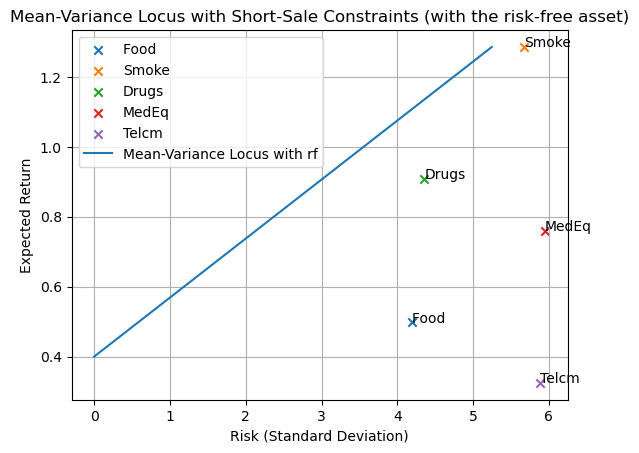

In [21]:
import numpy as np
from scipy.optimize import minimize

mu_values_w = np.linspace(risk_free_rate, np.max(mean_returns), 100)

# Store objective function values
objective_values = []

# Objective function: w' * Σ * w
def objective(w):
    return np.dot(w.T, np.dot(cov_matrix, w))

# Constraint: (Z_bar - R1)' * w = mu - R
def constraint_func(mu_values_w):
    return {'type': 'eq', 'fun': lambda w: np.dot(mean_returns - risk_free_rate, w) - (mu_values_w - risk_free_rate)}

# Initial guess
w0 = np.ones(len(mean_returns)) / len(mean_returns)

# Inequality constraint: w > 0
bounds = [(0, None) for _ in w0]

# Solve for each mu value
for mu in mu_values_w:
    constraint = constraint_func(mu)
    result = minimize(objective, w0, bounds=bounds, constraints=constraint)
    
    if result.success:
        objective_values.append(result.fun)
    else:
        # If optimization fails, record a large value
        objective_values.append(risk_free_rate)

# Plot the points for each industry
for i, industry in enumerate(returns.columns):
    plt.scatter(sd_returns.iloc[i], mean_returns.iloc[i], label=industry, marker='x')

# Add labels
for i, industry in enumerate(returns.columns):
    plt.text(sd_returns.iloc[i], mean_returns.iloc[i], f'{industry}', fontsize=10)

# Plot the graph
plt.plot(np.sqrt(objective_values), mu_values_w, label='Mean-Variance Locus with rf')
#plt.plot(np.sqrt(objective_values), -1 * mu_values + 2 * risk_free_rate, label='Objective function value')
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Expected Return')
plt.title('Mean-Variance Locus with Short-Sale Constraints (with the risk-free asset)')
plt.grid(True)
plt.legend()
plt.show()

In [23]:
# A6

import numpy as np
from scipy.optimize import minimize

# Objective function: Maximize Sharpe Ratio
def objective(w, mean_returns, cov_matrix, risk_free_rate):
    portfolio_return = np.dot(w, mean_returns)  # E[Rp]
    portfolio_volatility = np.sqrt(np.dot(w.T, np.dot(cov_matrix, w)))  # Sigma_p
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility  # Sharpe ratio
    return -sharpe_ratio  # We minimize the negative Sharpe ratio to maximize it

# Constraint: Sum of weights = 1
def constraint(w):
    return np.sum(w) - 1

# Initial guess for weights
n = len(mean_returns)
w0 = np.ones(n) / n  # Equal initial guess

# Bounds for each weight (0 <= w_i <= 1)
bounds = [(0, 1) for _ in range(n)]

# Constraints dictionary
constraints = [{'type': 'eq', 'fun': constraint}]

# Minimize the negative Sharpe ratio to find the optimal weights
result = minimize(objective, w0, args=(mean_returns, cov_matrix, risk_free_rate), bounds=bounds, constraints=constraints)

# Output optimal portfolio weights
if result.success:
    optimal_weights = result.x
    
    industries = ['Food', 'Smoke', 'Drugs', 'MedEq', 'Telcm']

    for industry, weight in zip(industries, optimal_weights):
        print(f"{industry}: {weight:.4f}")

    # Calculate the expected return and volatility of the Tangency Portfolio
    portfolio_return = np.dot(optimal_weights, mean_returns)  # Expected return of the portfolio
    portfolio_volatility = np.sqrt(np.dot(optimal_weights.T, np.dot(cov_matrix, optimal_weights)))  # Portfolio risk (volatility)
    
    print("Expected Return of Tangency Portfolio:", portfolio_return)
    print("Volatility (Risk) of Tangency Portfolio:", portfolio_volatility)
else:
    print("Optimization failed:", result.message)

Food: 0.0000
Smoke: 0.5927
Drugs: 0.4073
MedEq: 0.0000
Telcm: 0.0000
Expected Return of Tangency Portfolio: 1.132113963817578
Volatility (Risk) of Tangency Portfolio: 4.338212892292076


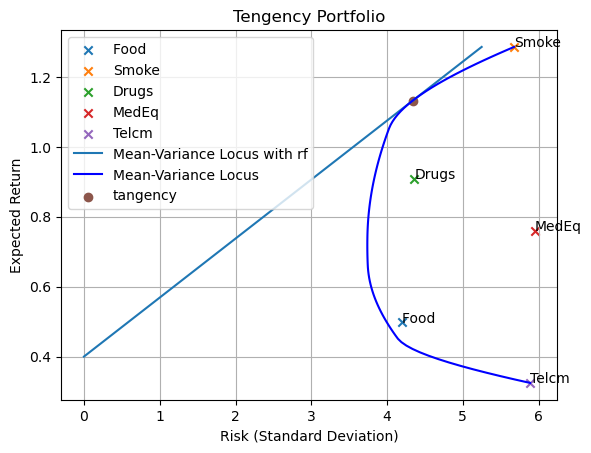

In [25]:
# Plot the points for each industry
for i, industry in enumerate(returns.columns):
    plt.scatter(sd_returns.iloc[i], mean_returns.iloc[i], label=industry, marker='x')

# Add labels
for i, industry in enumerate(returns.columns):
    plt.text(sd_returns.iloc[i], mean_returns.iloc[i], f'{industry}', fontsize=10)

plt.plot(np.sqrt(objective_values), mu_values_w, label='Mean-Variance Locus with rf')
plt.plot(np.sqrt(variance_values), mu_values, label="Mean-Variance Locus", color='blue')
# plot tengency portfolio
plt.scatter(portfolio_volatility, portfolio_return,label='tangency', marker='o')

plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Expected Return')
plt.title('Tengency Portfolio')
plt.grid(True)
plt.legend()
plt.show()

In [7]:
# B4 MAXSER

import numpy as np
from scipy import optimize

# Step 0: Subpool Selection
def subpool_selection(MeanReturns, CovarReturns, PortfolioSize, num_subpools=1000):
    subpools = []
    # Form 1,000 subpools of randomly picked assets
    for _ in range(num_subpools):
        selected_assets = np.random.choice(len(MeanReturns), PortfolioSize, replace=False)
        selected_MeanReturns = MeanReturns.iloc[selected_assets]  # Use .iloc for position-based indexing
        
        # Ensure covariance matrix is indexed by positions
        selected_CovarReturns = CovarReturns.iloc[selected_assets, selected_assets]
        
        # Calculate squared maximum Sharpe ratio for each subpool
        optimal_weights = optimize_sharpe_ratio(selected_MeanReturns, selected_CovarReturns)
        
        # Ensure there are no invalid values in the weights before calculating volatility
        if np.any(np.isnan(optimal_weights)) or np.any(np.isinf(optimal_weights)):
            continue
        
        squared_sharpe_ratio = (np.dot(optimal_weights, selected_MeanReturns) / np.sqrt(np.dot(optimal_weights.T, np.dot(selected_CovarReturns, optimal_weights))))**2
        subpools.append(squared_sharpe_ratio)
    
    # Select the subpool that corresponds to the 95% quantile of all squared Sharpe ratios
    quantile_95 = np.percentile(subpools, 95)
    return quantile_95

In [185]:
# Helper function to optimize the Sharpe ratio for a given subpool
def optimize_sharpe_ratio(MeanReturns, CovarReturns):
    def objective(weights, MeanReturns, CovarReturns):
        portfolio_return = np.dot(weights, MeanReturns)
        portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(CovarReturns, weights)))
        return -portfolio_return / portfolio_volatility  # Minimizing negative Sharpe ratio

    # Initial weights (equally distributed)
    initial_weights = np.ones(len(MeanReturns)) / len(MeanReturns)
    bounds = [(0, 1) for _ in range(len(MeanReturns))]
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})  # Fully invested portfolio

    result = optimize.minimize(objective, initial_weights, args=(MeanReturns, CovarReturns),
                               method='SLSQP', bounds=bounds, constraints=constraints)
    
    return result.x

In [187]:
# Step 1: Estimate Maximum Sharpe Ratio
def estimate_max_sharpe_ratio(MeanReturns, CovarReturns, RiskFreeRate, PortfolioSize):
    optimal_weights = optimize_sharpe_ratio(MeanReturns, CovarReturns)
    expected_return = np.dot(optimal_weights, MeanReturns)
    expected_risk = np.sqrt(np.dot(optimal_weights.T, np.dot(CovarReturns, optimal_weights)))
    squared_sharpe_ratio = (expected_return - RiskFreeRate) ** 2 / expected_risk**2
    return squared_sharpe_ratio

In [189]:
# Step 2: Cross-validation for λ
def cross_validation(MeanReturns, CovarReturns, RiskFreeRate, PortfolioSize, num_folds=10):
    fold_size = len(MeanReturns) // num_folds
    lambda_vals = []  # Store the lambda values
    
    for fold in range(num_folds):
        # Split data into training and validation sets
        val_start = fold * fold_size
        val_end = (fold + 1) * fold_size if fold < num_folds - 1 else len(MeanReturns)
        
        train_MeanReturns = np.delete(MeanReturns, np.s_[val_start:val_end], axis=0)
        train_CovarReturns = np.delete(CovarReturns, np.s_[val_start:val_end], axis=0)
        
        # Ensure we correctly slice the covariance matrix for the training set
        train_CovarReturns = train_CovarReturns[:, :len(train_MeanReturns)]
        
        # Calculate λ (this can be done based on optimization techniques or a heuristic)
        optimal_weights = optimize_sharpe_ratio(train_MeanReturns, train_CovarReturns)
        lambda_val = np.linalg.norm(optimal_weights)  # Placeholder: use norm as λ
        lambda_vals.append(lambda_val)
    
    # Take average of λ values from each fold
    lambda_hat = np.mean(lambda_vals)
    return lambda_hat

In [191]:
# Step 3: Solve for MAXSER Portfolio
def maxser_portfolio(MeanReturns, CovarReturns, RiskFreeRate, PortfolioSize, lambda_hat):
    def objective(weights, MeanReturns, CovarReturns, RiskFreeRate, lambda_hat):
        portfolio_return = np.dot(weights, MeanReturns)
        portfolio_risk = np.sqrt(np.dot(weights.T, np.dot(CovarReturns, weights)))
        risk_adjusted_return = (portfolio_return - RiskFreeRate) / portfolio_risk
        regularization_term = lambda_hat * np.linalg.norm(weights, ord=1)
        return -risk_adjusted_return + regularization_term
    
    initial_weights = np.ones(PortfolioSize) / PortfolioSize
    bounds = [(0, 1) for _ in range(PortfolioSize)]
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})  # Fully invested portfolio

    result = optimize.minimize(objective, initial_weights, args=(MeanReturns, CovarReturns, RiskFreeRate, lambda_hat),
                               method='SLSQP', bounds=bounds, constraints=constraints)
    
    return result.x  # Optimal portfolio weights

In [193]:
industry_names = returns_48.columns.tolist()
MeanReturns = returns_48.mean()
CovarReturns = returns_48.cov()
RiskFreeRate = 0.4
PortfolioSize = 48  # Example portfolio size

In [195]:
# Calculate Sharpe Ratio
def calculate_sharpe_ratio(weights, MeanReturns, CovarReturns, RiskFreeRate=0.0):
    # Calculate portfolio return
    portfolio_return = np.dot(weights, MeanReturns)
    # Calculate portfolio volatility (standard deviation)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(CovarReturns, weights)))
    # Calculate Sharpe Ratio
    sharpe_ratio = (portfolio_return - RiskFreeRate) / portfolio_volatility
    return sharpe_ratio

In [197]:
# Function to display optimal portfolio weights and Sharpe Ratio
def display_optimal_portfolio(MeanReturns, CovarReturns, industry_names, RiskFreeRate=0.0):
    # Obtain optimal weights (assuming maxser_portfolio function already provides optimal weights)
    optimal_weights = maxser_portfolio(MeanReturns, CovarReturns, RiskFreeRate, len(MeanReturns), lambda_hat)
    
    # Calculate maximum Sharpe ratio
    max_sharpe_ratio = calculate_sharpe_ratio(optimal_weights, MeanReturns, CovarReturns, RiskFreeRate)
    
    # Create a dictionary with industry names and their corresponding weights
    portfolio_weights = {industry_names[i]: optimal_weights[i] for i in range(len(industry_names))}
    
    # Sort portfolio weights by descending order for better readability
    sorted_portfolio_weights = sorted(portfolio_weights.items(), key=lambda x: x[1], reverse=True)
    
    # Print the optimal portfolio weights
    print("Optimal Portfolio Weights (sorted by weight):")
    for industry, weight in sorted_portfolio_weights:
        print(f"{industry}: {weight:.4f}")
    
    # Print the maximum Sharpe ratio
    print(f"\nMaximum Sharpe Ratio: {max_sharpe_ratio:.4f}")

In [199]:
# Step 0: Select subpool
quantile_95 = subpool_selection(MeanReturns, CovarReturns, PortfolioSize)

# Step 1: Estimate squared Sharpe ratio
squared_sharpe_ratio = estimate_max_sharpe_ratio(MeanReturns, CovarReturns, RiskFreeRate, PortfolioSize)

# Step 2: Cross-validation to select λ
lambda_hat = cross_validation(MeanReturns, CovarReturns, RiskFreeRate, PortfolioSize)

# Step 3: Solve for MAXSER portfolio
optimal_weights = maxser_portfolio(MeanReturns, CovarReturns, RiskFreeRate, PortfolioSize, lambda_hat)

# Step 3: Display the optimal portfolio weights and Sharpe Ratio
display_optimal_portfolio(MeanReturns, CovarReturns, industry_names, RiskFreeRate)

Optimal Portfolio Weights (sorted by weight):
Comps: 0.4756
Coal : 0.2376
Smoke: 0.2111
Oil  : 0.0565
Books: 0.0192
Autos: 0.0000
Mines: 0.0000
Agric: 0.0000
Food : 0.0000
Soda : 0.0000
Beer : 0.0000
Toys : 0.0000
Fun  : 0.0000
Hshld: 0.0000
Clths: 0.0000
Hlth : 0.0000
MedEq: 0.0000
Drugs: 0.0000
Chems: 0.0000
Rubbr: 0.0000
Txtls: 0.0000
BldMt: 0.0000
Cnstr: 0.0000
Steel: 0.0000
FabPr: 0.0000
Mach : 0.0000
ElcEq: 0.0000
Aero : 0.0000
Ships: 0.0000
Guns : 0.0000
Gold : 0.0000
Util : 0.0000
Telcm: 0.0000
PerSv: 0.0000
BusSv: 0.0000
Chips: 0.0000
LabEq: 0.0000
Paper: 0.0000
Boxes: 0.0000
Trans: 0.0000
Whlsl: 0.0000
Rtail: 0.0000
Meals: 0.0000
Banks: 0.0000
Insur: 0.0000
RlEst: 0.0000
Fin  : 0.0000
Other: 0.0000

Maximum Sharpe Ratio: 0.4841


/var/folders/pm/0zt05fbn7n3d69fml1_1lv6w0000gn/T/ipykernel_8075/230703178.py:5: RuntimeWarning: invalid value encountered in sqrt
  portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(CovarReturns, weights)))
